In [1]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
rdoge = pd.read_csv('data\R Doge SentimentPrice.csv');
rpepe = pd.read_csv('data\R Pepe SentimentPrice.csv');
rshiba = pd.read_csv('data\R Shiba SentimentPrice.csv');
rfloki = pd.read_csv('data\R Floki SentimentPrice.csv');

tdoge = pd.read_csv('data\Sorted Sent+Price - Doge.csv');
tpepe = pd.read_csv('data\Sorted Sent+Price - Pepe.csv');
tshiba = pd.read_csv('data\Sorted Sent+Price - Shiba.csv');
tfloki = pd.read_csv('data\Sorted Sent+Price - Floki.csv');

rdoge = rfloki.drop(columns=['Unnamed: 0'])
rpepe = rpepe.drop(columns=['Unnamed: 0'])
rshiba = rshiba.drop(columns=['Unnamed: 0'])
rfloki = rfloki.drop(columns=['Unnamed: 0'])

tdoge = tfloki.drop(columns=['Unnamed: 0']).rename(columns={'mentions_shiba inu':'mentions_shiba_inu'})
tpepe = tpepe.drop(columns=['Unnamed: 0']).rename(columns={'mentions_shiba inu':'mentions_shiba_inu'})
tshiba = tshiba.drop(columns=['Unnamed: 0']).rename(columns={'mentions_shiba inu':'mentions_shiba_inu'})
tfloki = tfloki.drop(columns=['Unnamed: 0', 'Unnamed: 0.1']).rename(columns={'mentions_shiba inu':'mentions_shiba_inu'})

tdoge = tdoge.drop(columns=['Unnamed: 0.1'])

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:4: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\671266758.py:1: SyntaxWarning: invalid escape sequence '\R'
  rdoge = pd.read_csv('data\R Doge SentimentPrice.csv');
C:\Users\mnurh\AppData\Local\Temp

In [3]:

print(rdoge.head(0))
print(rpepe.head(0))
print(rshiba.head(0))
print(rfloki.head(0))

print(tdoge.head(0))
print(tpepe.head(0))
print(tshiba.head(0))
print(tfloki.head(0))

Empty DataFrame
Columns: [Date, clean_text, sentiment, compound_score, positive_score, negative_score, neutral_score, sentiment_category, mentions_dogecoin, mentions_shiba_inu, mentions_pepe, mentions_floki, mentions_bonk, mentions_wojak, mentions_other, Close, Open, High, Low, Volume]
Index: []
Empty DataFrame
Columns: [Date, clean_text, sentiment, compound_score, positive_score, negative_score, neutral_score, sentiment_category, mentions_dogecoin, mentions_shiba_inu, mentions_pepe, mentions_floki, mentions_bonk, mentions_wojak, mentions_other, Close, Open, High, Low, Volume]
Index: []
Empty DataFrame
Columns: [Date, clean_text, sentiment, compound_score, positive_score, negative_score, neutral_score, sentiment_category, mentions_dogecoin, mentions_shiba_inu, mentions_pepe, mentions_floki, mentions_bonk, mentions_wojak, mentions_other, Close, Open, High, Low, Volume]
Index: []
Empty DataFrame
Columns: [Date, clean_text, sentiment, compound_score, positive_score, negative_score, neutra

In [4]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    print(len(df))
    print(df.isna().sum())

114
Date                  0
clean_text            0
sentiment             0
compound_score        0
positive_score        0
negative_score        0
neutral_score         0
sentiment_category    0
mentions_dogecoin     0
mentions_shiba_inu    0
mentions_pepe         0
mentions_floki        0
mentions_bonk         0
mentions_wojak        0
mentions_other        0
Close                 0
Open                  0
High                  0
Low                   0
Volume                0
dtype: int64
4110
Date                  0
clean_text            0
sentiment             0
compound_score        0
positive_score        0
negative_score        0
neutral_score         0
sentiment_category    0
mentions_dogecoin     0
mentions_shiba_inu    0
mentions_pepe         0
mentions_floki        0
mentions_bonk         0
mentions_wojak        0
mentions_other        0
Close                 0
Open                  0
High                  0
Low                   0
Volume                0
dtype: int64
378
D

In [5]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    print(df['Volume'].map(type).value_counts())

Volume
<class 'str'>    114
Name: count, dtype: int64
Volume
<class 'str'>    4110
Name: count, dtype: int64
Volume
<class 'float'>    378
Name: count, dtype: int64
Volume
<class 'str'>    114
Name: count, dtype: int64
Volume
<class 'str'>    4358
Name: count, dtype: int64
Volume
<class 'str'>    28075
Name: count, dtype: int64
Volume
<class 'float'>    42693
Name: count, dtype: int64
Volume
<class 'str'>    4358
Name: count, dtype: int64


In [6]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    print(df['Volume'].head(5))

0    14.45B
1    19.67B
2     7.41B
3     8.79B
4     8.79B
Name: Volume, dtype: object
0    90,522.63B
1    90,522.63B
2    90,522.63B
3    90,522.63B
4    90,522.63B
Name: Volume, dtype: object
0    7.395420e+07
1    7.395420e+07
2    7.395420e+07
3    7.395420e+07
4    1.700563e+08
Name: Volume, dtype: float64
0    14.45B
1    19.67B
2     7.41B
3     8.79B
4     8.79B
Name: Volume, dtype: object
0    15.86B
1    15.86B
2    15.86B
3    15.86B
4    15.86B
Name: Volume, dtype: object
0    86,848.92B
1    86,848.92B
2    86,848.92B
3    86,848.92B
4    86,848.92B
Name: Volume, dtype: object
0    1988.31
1    1988.31
2    1988.31
3    1988.31
4    1630.18
Name: Volume, dtype: float64
0    15.86B
1    15.86B
2    15.86B
3    15.86B
4    15.86B
Name: Volume, dtype: object


In [7]:
def convert_volume(val):
    import pandas as pd
    
    if pd.isna(val):
        return None

    if isinstance(val, (int, float)):
        return float(val)  # Already numeric

    val = str(val).replace(',', '')  # Remove commas

    multiplier = 1
    if val.endswith('B'):
        multiplier = 1_000_000_000
        val = val[:-1]
    elif val.endswith('M'):
        multiplier = 1_000_000
        val = val[:-1]
    elif val.endswith('K'):
        multiplier = 1_000
        val = val[:-1]

    try:
        return float(val) * multiplier
    except ValueError:
        return None  # or np.nan

In [8]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    df['Volume'] = df['Volume'].apply(convert_volume)

In [9]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    print(df['Volume'].map(type).value_counts())
    print(df['Volume'].isna().sum())
    print(df['Date'].head(1))

Volume
<class 'float'>    114
Name: count, dtype: int64
0
0    2023-02-02
Name: Date, dtype: object
Volume
<class 'float'>    4110
Name: count, dtype: int64
0
0    2021-05-19
Name: Date, dtype: object
Volume
<class 'float'>    378
Name: count, dtype: int64
0
0    2023-04-18
Name: Date, dtype: object
Volume
<class 'float'>    114
Name: count, dtype: int64
0
0    2023-02-02
Name: Date, dtype: object
Volume
<class 'float'>    4358
Name: count, dtype: int64
0
0    30-01-2023
Name: Date, dtype: object
Volume
<class 'float'>    28075
Name: count, dtype: int64
0
0    12-05-2021
Name: Date, dtype: object
Volume
<class 'float'>    42693
Name: count, dtype: int64
0
0    15-04-2023
Name: Date, dtype: object
Volume
<class 'float'>    4358
Name: count, dtype: int64
0
0    30-01-2023
Name: Date, dtype: object


In [10]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    # Step 1: Parse dates safely (handles mixed formats)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

    # Step 2: Drop rows where date couldn't be parsed
    df.dropna(subset=['Date'], inplace=True)

    # Step 3: Convert to string format YYYY-MM-DD (optional, only if you need it as string)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

    # If you're doing time series modeling, keep it as datetime (skip step 3)


C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\2279058134.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\2279058134.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [11]:
for df in [tdoge, tshiba, tpepe, tfloki, rdoge,rshiba, rpepe, rfloki]:
    print(df['Date'].isna().sum())

0
0
0
0
0
0
0
0


In [12]:
# Concatenate matching pairs
doge_df = pd.concat([rdoge, tdoge], ignore_index=True)
pepe_df = pd.concat([rpepe, tpepe], ignore_index=True)
shiba_df = pd.concat([rshiba, tshiba], ignore_index=True)
floki_df = pd.concat([rfloki, tfloki], ignore_index=True)

In [14]:
for df in [doge_df, pepe_df, shiba_df, floki_df]:
    print(df['Volume'].isna().sum())  
    print(df['Date'].head(1))

0
0    2023-01-30
Name: Date, dtype: object
0
0    2023-04-15
Name: Date, dtype: object
0
0    2021-05-12
Name: Date, dtype: object
0
0    2023-01-30
Name: Date, dtype: object


In [15]:
# for df in [doge_df, pepe_df, shiba_df, floki_df]:
print(doge_df['Volume'].map(type).value_counts())
print(shiba_df['Volume'].map(type).value_counts())
print(pepe_df['Volume'].map(type).value_counts())
print(floki_df['Volume'].map(type).value_counts())

Volume
<class 'float'>    4412
Name: count, dtype: int64
Volume
<class 'float'>    32185
Name: count, dtype: int64
Volume
<class 'float'>    43071
Name: count, dtype: int64
Volume
<class 'float'>    4412
Name: count, dtype: int64


In [16]:
doge_group = doge_df.groupby('Date').agg({
    'compound_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean',
    'negative_score': 'mean',
    'Open': 'first',
    'Close': 'first',
    'High': 'first',
    'Low': 'first',
    'Volume': 'mean'
}).reset_index()

shiba_group = shiba_df.groupby('Date').agg({
    'compound_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean',
    'negative_score': 'mean',
    'Open': 'first',
    'Close': 'first',
    'High': 'first',
    'Low': 'first',
    'Volume': 'mean'
}).reset_index()

pepe_group = pepe_df.groupby('Date').agg({
    'compound_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean',
    'negative_score': 'mean',
    'Open': 'first',
    'Close': 'first',
    'High': 'first',
    'Low': 'first',
    'Volume': 'mean'
}).reset_index()

floki_group = floki_df.groupby('Date').agg({
    'compound_score': 'mean',
    'positive_score': 'mean',
    'neutral_score': 'mean',
    'negative_score': 'mean',
    'Open': 'first',
    'Close': 'first',
    'High': 'first',
    'Low': 'first',
    'Volume': 'mean'
}).reset_index()

In [17]:
print("Doge stats:")
print(doge_group[['Open', 'High', 'Low', 'Close']].describe())
print("Variance per target:")
print(doge_group[['Open', 'High', 'Low', 'Close']].var())

print("Shiba stats:")
print(shiba_group[['Open', 'High', 'Low', 'Close']].describe())
print("Variance per target:")
print(shiba_group[['Open', 'High', 'Low', 'Close']].var())

print("Pepe stats:")
print(pepe_group[['Open', 'High', 'Low', 'Close']].describe())
print("Variance per target:")
print(pepe_group[['Open', 'High', 'Low', 'Close']].var())

print("Floki stats:")
print(floki_group[['Open', 'High', 'Low', 'Close']].describe())
print("Variance per target:")
print(floki_group[['Open', 'High', 'Low', 'Close']].var())

Doge stats:
             Open        High         Low       Close
count  640.000000  640.000000  640.000000  640.000000
mean     0.000099    0.000106    0.000094    0.000099
std      0.000082    0.000088    0.000077    0.000082
min      0.000015    0.000016    0.000015    0.000015
25%      0.000031    0.000032    0.000029    0.000031
50%      0.000041    0.000045    0.000038    0.000041
75%      0.000169    0.000177    0.000161    0.000169
max      0.000322    0.000348    0.000304    0.000323
Variance per target:
Open     6.739715e-09
High     7.719788e-09
Low      5.927550e-09
Close    6.731979e-09
dtype: float64
Shiba stats:
              Open         High          Low        Close
count  1304.000000  1304.000000  1304.000000  1304.000000
mean      0.000016     0.000017     0.000015     0.000016
std       0.000010     0.000011     0.000009     0.000010
min       0.000006     0.000006     0.000005     0.000006
25%       0.000009     0.000009     0.000008     0.000009
50%       0.00001

In [18]:
from datetime import datetime

# Helper function to train SVR with GridSearchCV for a single target
def train_svr_with_gridsearch(df, target):
    X = df[['compound_score']].values
    y = df[target].values

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

    # Train/test split (non-shuffled for time series)
    split_idx = int(len(X_scaled) * 0.8)
    X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
    y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]

    param_grid = {
        "C": [0.1, 1, 10],
        "epsilon": [0.01, 0.1, 0.2],
        "kernel": ["rbf"]
    }
    grid_search = GridSearchCV(SVR(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Predictions on test set
    y_pred_scaled = grid_search.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Predictions on entire dataset
    y_full_pred_scaled = grid_search.predict(X_scaled)
    y_full_pred = scaler_y.inverse_transform(y_full_pred_scaled.reshape(-1, 1)).ravel()

    last_date = pd.to_datetime(df['Date'].max())
    today = pd.to_datetime(datetime.today().date())  # Now this works
    num_days = (today - last_date).days

    if num_days <= 0:
        print("No prediction needed — data is already up to date.")
    else:
        # Generate future dates
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_days)

    # Future forecast
    future_scores = np.linspace(-1, 1, num_days).reshape(-1, 1)
    future_scaled = scaler_X.transform(future_scores)
    future_pred_scaled = grid_search.predict(future_scaled)
    future_pred = scaler_y.inverse_transform(future_pred_scaled.reshape(-1, 1)).ravel()

    return {
        "model": grid_search.best_estimator_,
        "mse": mean_squared_error(y_test_inv, y_pred),
        "dates": df['Date'].values,
        "predictions": y_pred,
        "actuals": y_test_inv,
        "future_forecast": future_pred,
        "best_params": grid_search.best_params_,
        "full_predictions": y_full_pred,
        "full_actuals": y,
        "scaler_X": scaler_X,
        "scaler_y": scaler_y,
    }

In [20]:
# Your datasets dictionary setup - replace doge_group etc with actual dfs
datasets = {
    "doge": doge_group,
    "shiba": shiba_group,
    "pepe": pepe_group,
    "floki": floki_group
}

targets = ['Open', 'High', 'Low', 'Close']
results = {}

for coin, df in datasets.items():
    df = df.sort_values('Date').dropna()
    results[coin] = {}
    for target in targets:
        res = train_svr_with_gridsearch(df, target)
        results[coin][target] = res

        model_dir = "saved_models3"
        os.makedirs(model_dir, exist_ok=True)  # Create folder if it doesn't exist
        model_path1 = os.path.join(model_dir, f"{coin}_{target}_svr_model.joblib")
        model_path2 = os.path.join(model_dir, f"{coin}_{target}_svr_scaler_X.joblib")
        model_path3 = os.path.join(model_dir, f"{coin}_{target}_svr_scaler_y.joblib")

        # Save the trained model
        joblib.dump(res["model"], model_path1)
        joblib.dump(res['scaler_X'], model_path2)
        joblib.dump(res['scaler_y'], model_path3)




=== DOGE ===
         Date  compound_score  positive_score  neutral_score  negative_score  \
0  2023-01-30        0.260150        0.106167       0.848333          0.0455   
1  2023-01-31        0.355044        0.149111       0.846000          0.0050   
2  2023-02-01        0.718840        0.391200       0.557800          0.0510   
3  2023-02-02        0.285800        0.100667       0.899333          0.0000   
4  2023-02-03        0.449600        0.254000       0.651000          0.0950   

       Open     Close      High       Low        Volume  
0  0.000024  0.000025  0.000028  0.000021  1.586000e+10  
1  0.000025  0.000024  0.000026  0.000022  1.305000e+10  
2  0.000024  0.000025  0.000025  0.000022  1.034000e+10  
3  0.000025  0.000025  0.000027  0.000024  1.445000e+10  
4  0.000025  0.000026  0.000026  0.000022  1.437000e+10  
{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.917644299207027e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03'

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


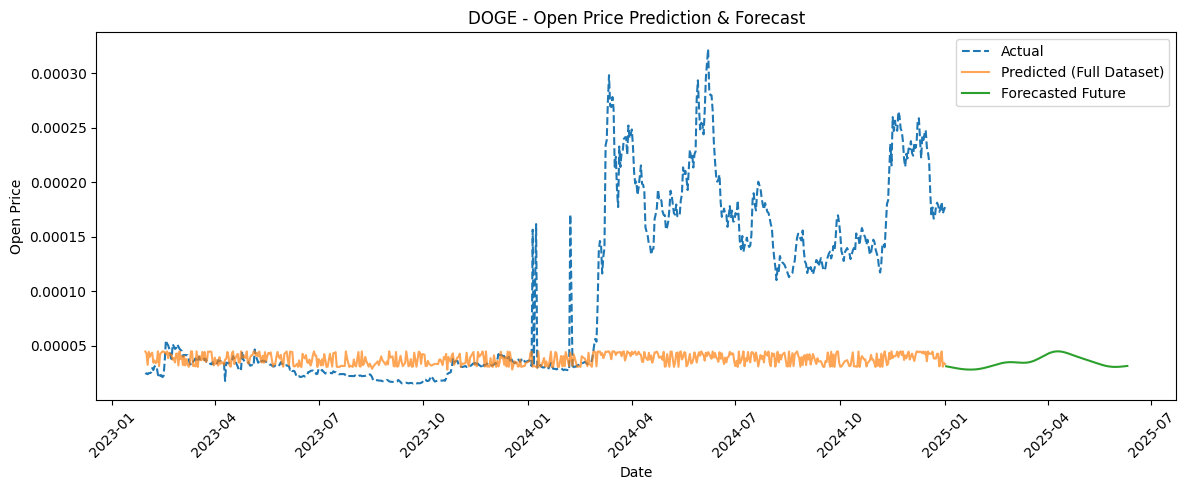

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 2.1236022668306824e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
       '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
       '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
       '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
       '2023-03-27', '2023-03-28', '2023-0

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


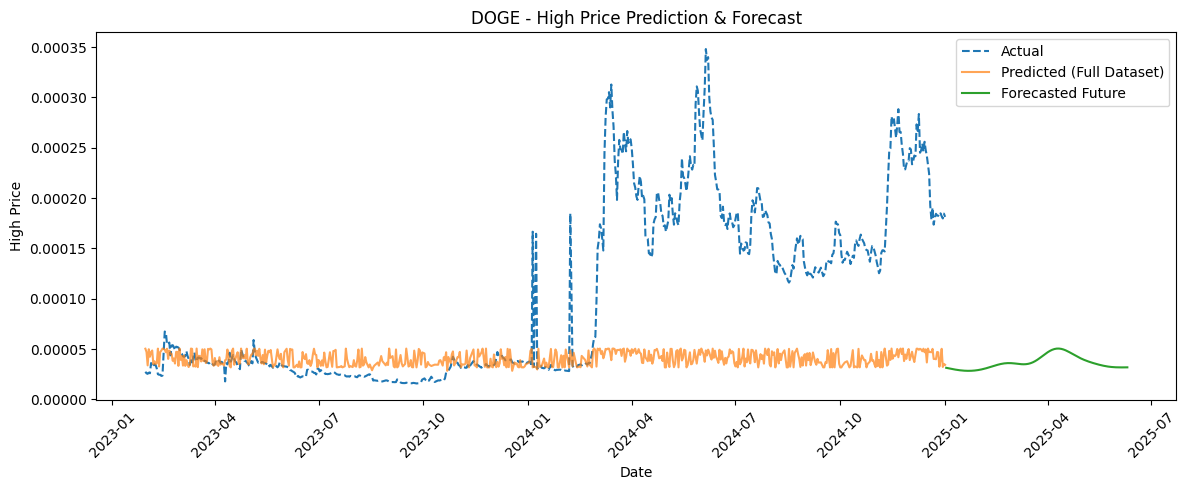

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.746675849777841e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
       '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
       '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
       '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
       '2023-03-27', '2023-03-28', '2023-03

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()




Target: Low
Best Params: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error (MSE): 0.00000002
R² Score: -8.9400
Predicted vs Actual (first 20 test samples):
  Predicted: 0.000041 | Actual: 0.000112
  Predicted: 0.000030 | Actual: 0.000113
  Predicted: 0.000039 | Actual: 0.000116
  Predicted: 0.000030 | Actual: 0.000119
  Predicted: 0.000038 | Actual: 0.000126
  Predicted: 0.000039 | Actual: 0.000135
  Predicted: 0.000041 | Actual: 0.000146
  Predicted: 0.000037 | Actual: 0.000141
  Predicted: 0.000035 | Actual: 0.000147
  Predicted: 0.000030 | Actual: 0.000145


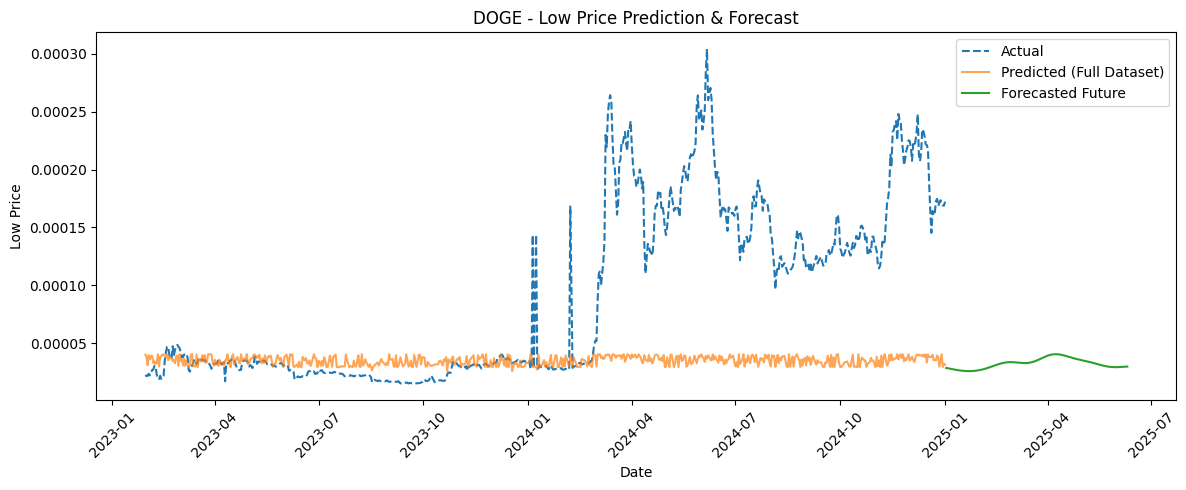

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.9264031540317225e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
       '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
       '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
       '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
       '2023-03-27', '2023-03-28', '2023-0

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


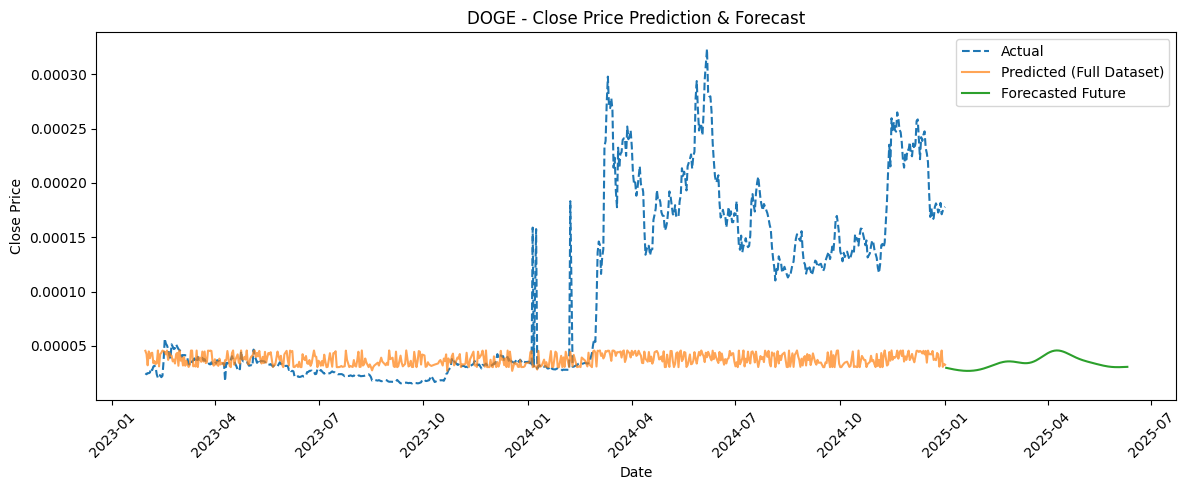


=== SHIBA ===
         Date  compound_score  positive_score  neutral_score  negative_score  \
0  2021-05-12        0.217253        0.142751       0.793253        0.063986   
1  2021-05-13        0.285077        0.170476       0.751150        0.078384   
2  2021-05-14        0.342112        0.168340       0.775025        0.056594   
3  2021-05-15        0.271369        0.162225       0.759721        0.078061   
4  2021-05-16        0.297645        0.170284       0.762624        0.067108   

       Open     Close      High       Low        Volume  
0  0.000030  0.000018  0.000030  0.000018  8.684892e+13  
1  0.000018  0.000021  0.000021  0.000016  9.138221e+13  
2  0.000021  0.000018  0.000021  0.000018  4.092923e+13  
3  0.000018  0.000016  0.000018  0.000015  4.372410e+13  
4  0.000016  0.000018  0.000018  0.000013  6.161436e+13  
{'model': SVR(C=0.1), 'mse': 1.192375072770537e-10, 'dates': array(['2021-05-12', '2021-05-13', '2021-05-14', ..., '2024-12-30',
       '2024-12-31', '2025-

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


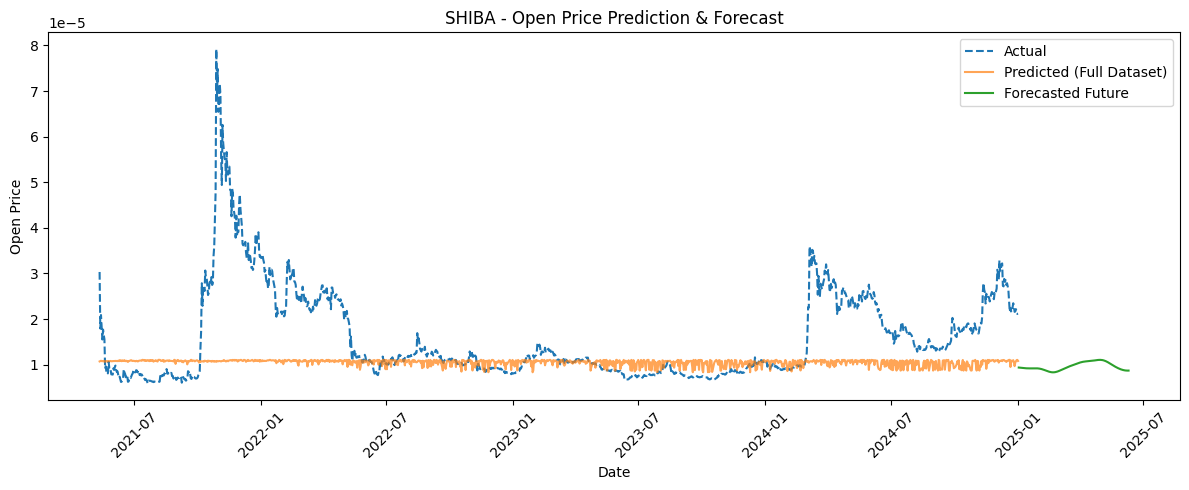

{'model': SVR(C=0.1), 'mse': 1.297215509145485e-10, 'dates': array(['2021-05-12', '2021-05-13', '2021-05-14', ..., '2024-12-30',
       '2024-12-31', '2025-01-01'], dtype=object), 'predictions': array([9.90164883e-06, 1.12622834e-05, 1.02110217e-05, 1.13177935e-05,
       1.11928442e-05, 1.13828272e-05, 1.13364547e-05, 1.11746807e-05,
       1.07551707e-05, 1.10129409e-05, 1.02978082e-05, 1.13568074e-05,
       1.12400269e-05, 1.13651555e-05, 1.12500057e-05, 1.13914020e-05,
       1.08944616e-05, 1.02682810e-05, 1.09535154e-05, 1.12585864e-05,
       1.12617862e-05, 1.12755636e-05, 1.13471947e-05, 1.08375931e-05,
       1.13646652e-05, 1.13617029e-05, 1.13910994e-05, 1.04957429e-05,
       1.09841191e-05, 1.11050514e-05, 1.13762550e-05, 1.10860863e-05,
       1.13696270e-05, 1.05621606e-05, 1.12481207e-05, 1.12117401e-05,
       1.12483251e-05, 1.10691275e-05, 1.12954863e-05, 1.13643074e-05,
       1.07742546e-05, 1.13877712e-05, 1.11117489e-05, 1.13651555e-05,
       1.12494584e-05, 1

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


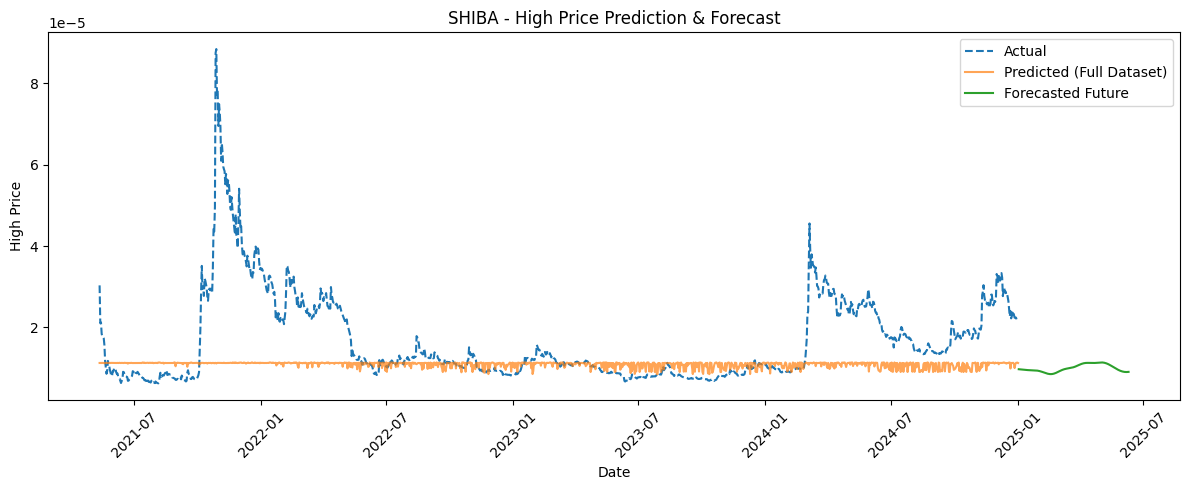

{'model': SVR(C=0.1), 'mse': 1.0633588411223015e-10, 'dates': array(['2021-05-12', '2021-05-13', '2021-05-14', ..., '2024-12-30',
       '2024-12-31', '2025-01-01'], dtype=object), 'predictions': array([9.30399554e-06, 1.03692596e-05, 9.58748117e-06, 1.06270149e-05,
       1.02314561e-05, 1.06952913e-05, 1.06521852e-05, 1.04838579e-05,
       1.00191389e-05, 1.03302902e-05, 9.70421693e-06, 1.06767099e-05,
       1.02562493e-05, 1.06859530e-05, 1.04744985e-05, 1.07104388e-05,
       1.00915117e-05, 9.64016605e-06, 1.02745557e-05, 1.05112434e-05,
       1.05210163e-05, 1.03400184e-05, 1.06555839e-05, 1.01664292e-05,
       1.06744611e-05, 1.06712063e-05, 1.07102666e-05, 9.84986981e-06,
       1.03032263e-05, 1.04173113e-05, 1.06875202e-05, 1.01819453e-05,
       1.06799796e-05, 9.91121631e-06, 1.04585266e-05, 1.05196770e-05,
       1.04608998e-05, 1.03832615e-05, 1.05924479e-05, 1.06850363e-05,
       1.01075810e-05, 1.07078961e-05, 1.04236781e-05, 1.06859530e-05,
       1.04150536e-05, 

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


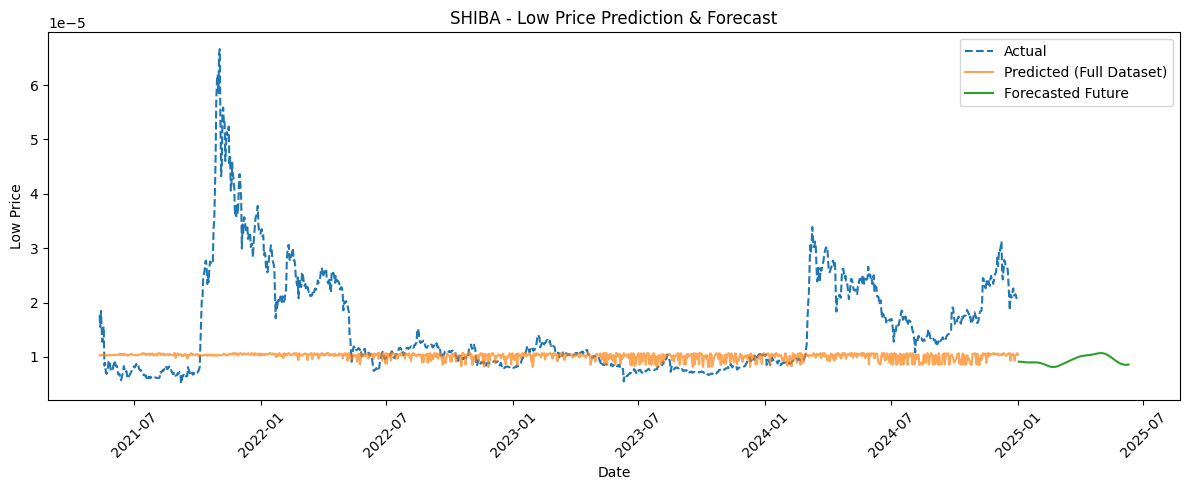

{'model': SVR(C=0.1), 'mse': 1.178672915764834e-10, 'dates': array(['2021-05-12', '2021-05-13', '2021-05-14', ..., '2024-12-30',
       '2024-12-31', '2025-01-01'], dtype=object), 'predictions': array([9.50893762e-06, 1.07857686e-05, 9.80266013e-06, 1.10659195e-05,
       1.06473694e-05, 1.11173736e-05, 1.10933599e-05, 1.08335297e-05,
       1.03784482e-05, 1.06429846e-05, 9.97990574e-06, 1.11192771e-05,
       1.06758612e-05, 1.11286301e-05, 1.08965872e-05, 1.11481896e-05,
       1.04715770e-05, 9.85866291e-06, 1.05756008e-05, 1.09371014e-05,
       1.09479534e-05, 1.07574764e-05, 1.10595790e-05, 1.04471797e-05,
       1.10863322e-05, 1.10816544e-05, 1.11482625e-05, 1.00865234e-05,
       1.06101576e-05, 1.07499987e-05, 1.11055019e-05, 1.05867698e-05,
       1.10943443e-05, 1.01547691e-05, 1.08791707e-05, 1.08792102e-05,
       1.08817494e-05, 1.07078481e-05, 1.10276166e-05, 1.11277186e-05,
       1.03784750e-05, 1.11476753e-05, 1.07579223e-05, 1.11286301e-05,
       1.08326560e-05, 1

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


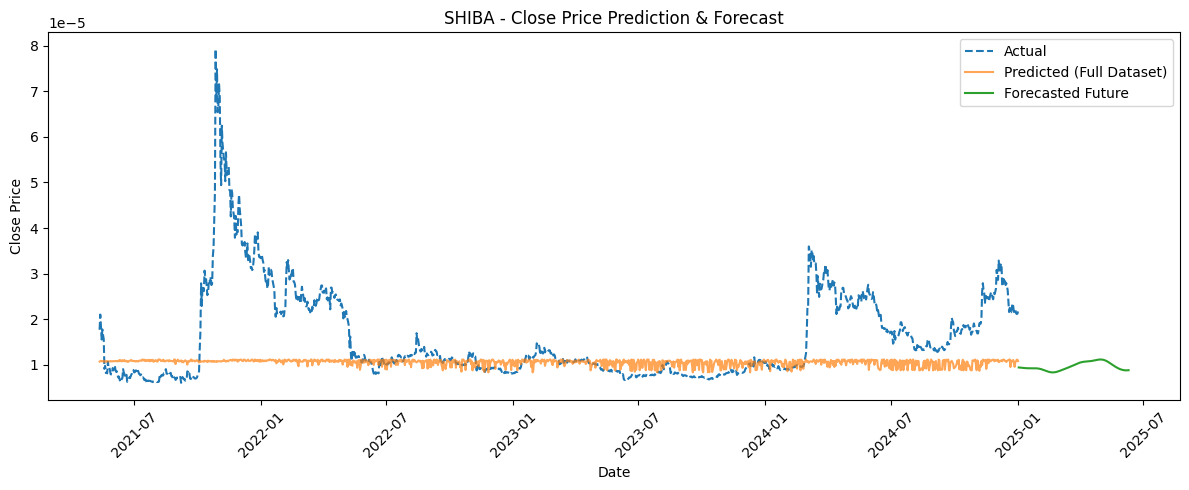


=== PEPE ===
         Date  compound_score  positive_score  neutral_score  negative_score  \
0  2023-04-15        0.180025        0.110000       0.823750        0.066250   
1  2023-04-16       -0.078120        0.070800       0.750200        0.179000   
2  2023-04-17       -0.271150        0.000000       0.731000        0.269000   
3  2023-04-18        0.325044        0.123500       0.815688        0.060750   
4  2023-04-19        0.004625        0.087263       0.823026        0.089711   

           Open         Close          High           Low        Volume  
0  1.898400e-10  7.620320e-09  7.654880e-09  1.898400e-10  1.988310e+03  
1  6.673120e-09  2.085237e-08  2.321937e-08  3.486790e-09  1.630180e+03  
2  2.066403e-08  6.637550e-08  7.956576e-08  1.664052e-08  4.638521e+07  
3  6.579608e-08  1.860684e-07  2.261546e-07  5.483940e-08  7.395420e+07  
4  1.872978e-07  2.641861e-07  3.677884e-07  1.368567e-07  1.700563e+08  
{'model': SVR(C=0.1, epsilon=0.2), 'mse': 1.5282202659770273e

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


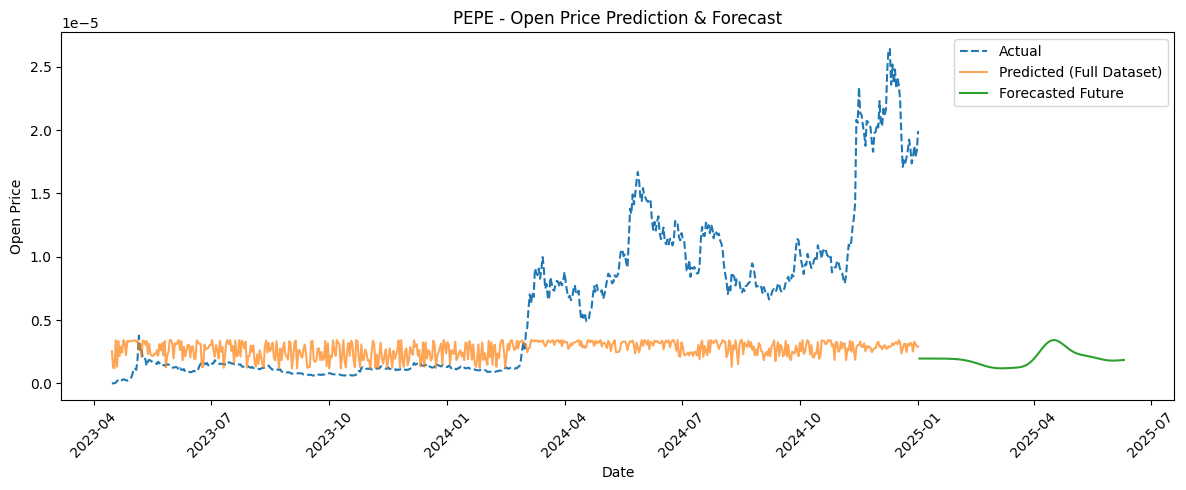

{'model': SVR(C=0.1, epsilon=0.2), 'mse': 1.698400874174965e-10, 'dates': array(['2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18',
       '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22',
       '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
       '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30',
       '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
       '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
       '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
       '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
       '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
       '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
       '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01',
       '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
       '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
       '2023-06-10', '2023-06-11', '2023-06-

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


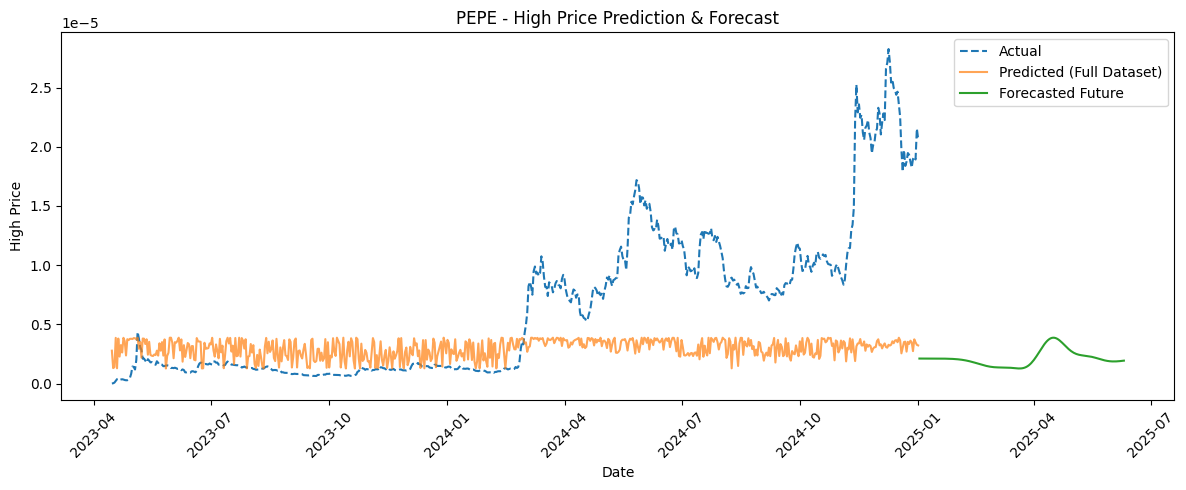

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.526280006130634e-10, 'dates': array(['2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18',
       '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22',
       '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
       '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30',
       '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
       '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
       '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
       '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
       '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
       '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
       '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01',
       '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
       '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
       '2023-06-10', '2023-06-11', '2023-06

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


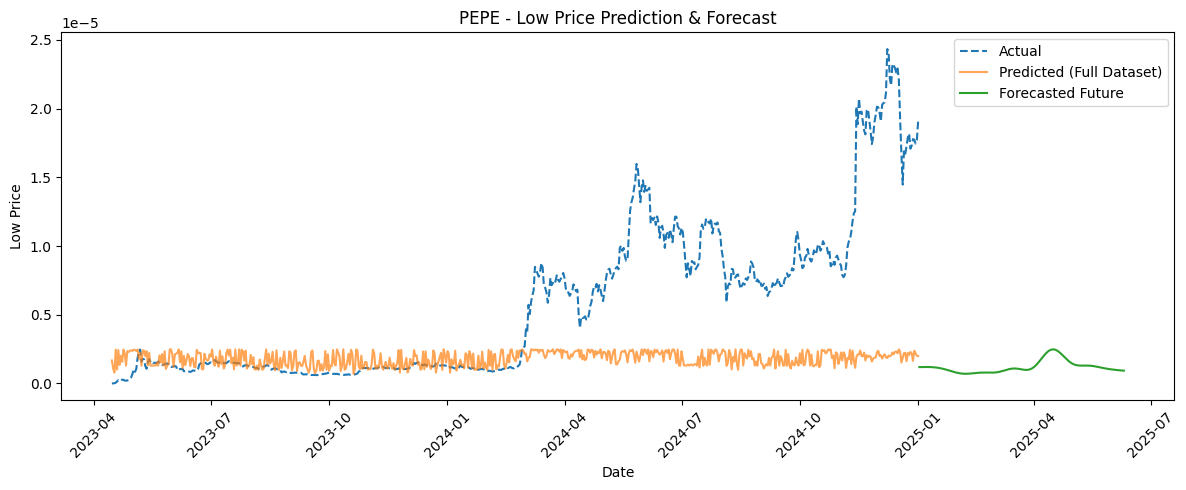

{'model': SVR(C=0.1, epsilon=0.2), 'mse': 1.5323293435147137e-10, 'dates': array(['2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18',
       '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22',
       '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
       '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30',
       '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
       '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
       '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
       '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
       '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
       '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
       '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01',
       '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05',
       '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
       '2023-06-10', '2023-06-11', '2023-06

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


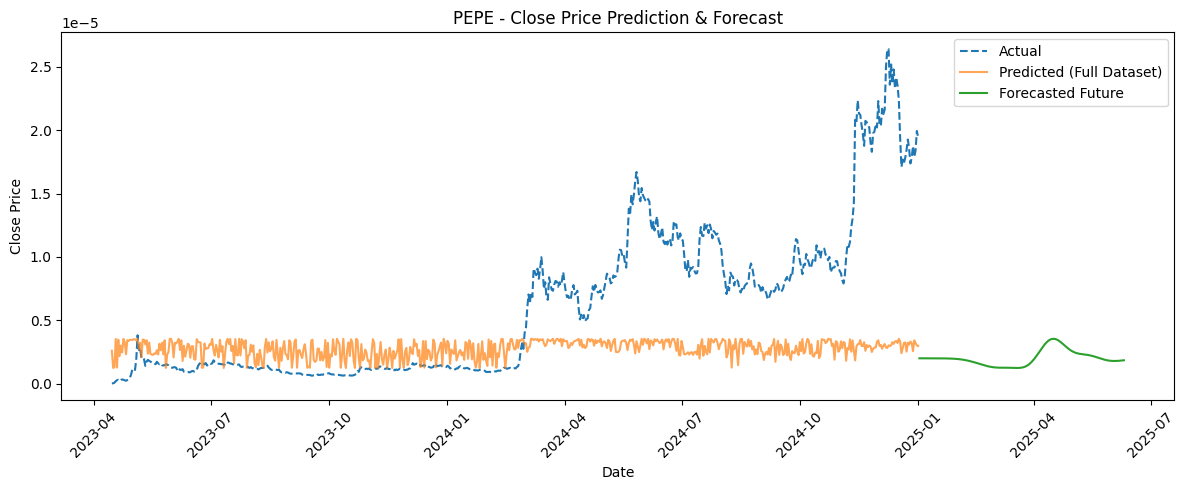


=== FLOKI ===
         Date  compound_score  positive_score  neutral_score  negative_score  \
0  2023-01-30        0.260150        0.106167       0.848333          0.0455   
1  2023-01-31        0.355044        0.149111       0.846000          0.0050   
2  2023-02-01        0.718840        0.391200       0.557800          0.0510   
3  2023-02-02        0.285800        0.100667       0.899333          0.0000   
4  2023-02-03        0.449600        0.254000       0.651000          0.0950   

       Open     Close      High       Low        Volume  
0  0.000024  0.000025  0.000028  0.000021  1.586000e+10  
1  0.000025  0.000024  0.000026  0.000022  1.305000e+10  
2  0.000024  0.000025  0.000025  0.000022  1.034000e+10  
3  0.000025  0.000025  0.000027  0.000024  1.445000e+10  
4  0.000025  0.000026  0.000026  0.000022  1.437000e+10  
{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.917644299207027e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


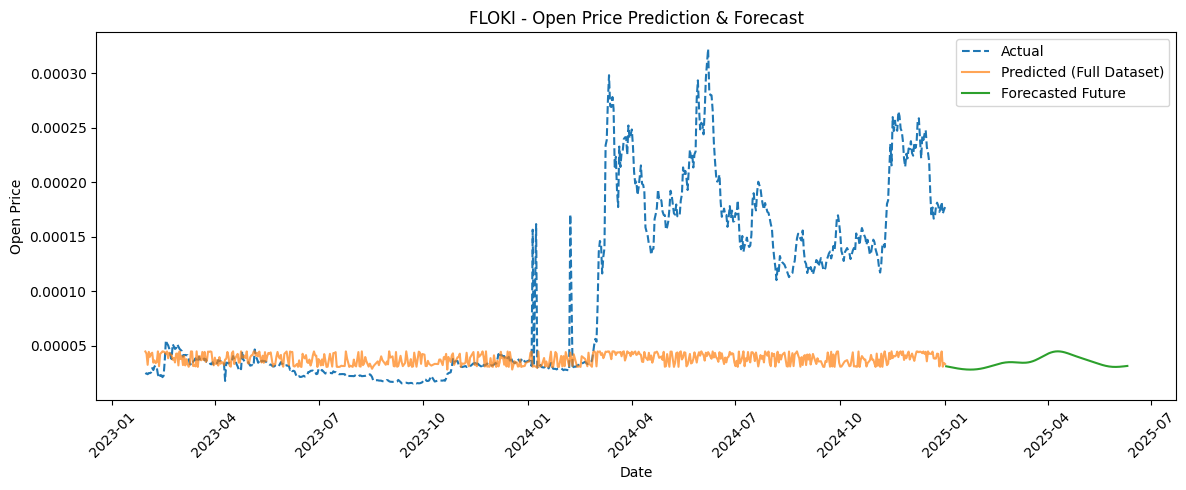

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 2.1236022668306824e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
       '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
       '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
       '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
       '2023-03-27', '2023-03-28', '2023-0

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


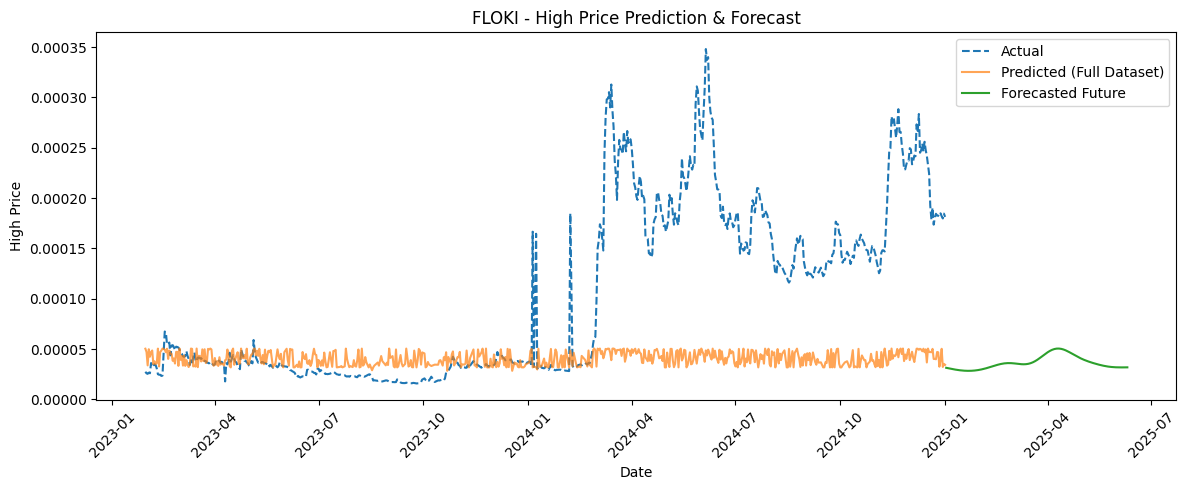

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.746675849777841e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
       '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
       '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
       '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
       '2023-03-27', '2023-03-28', '2023-03

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


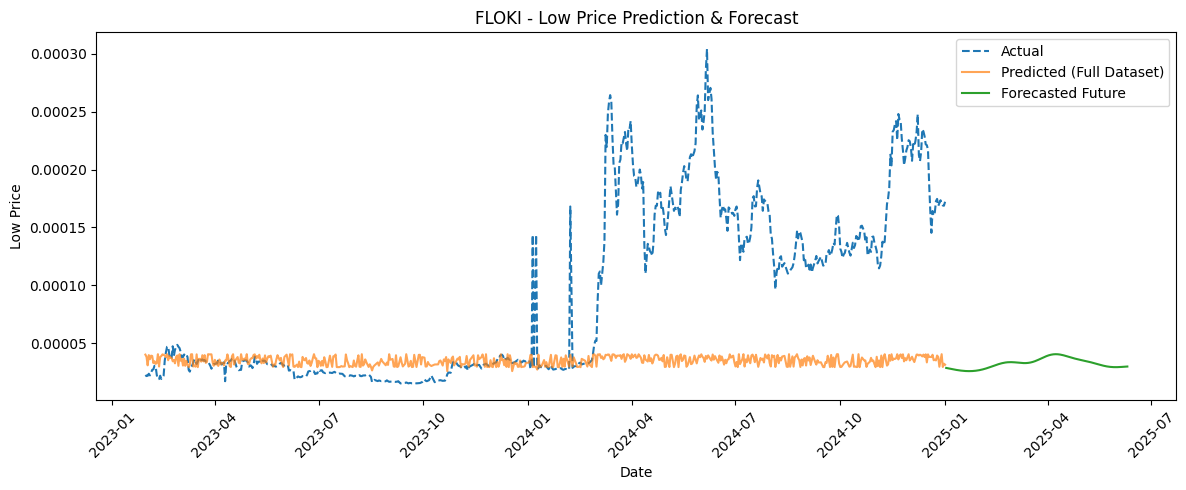

{'model': SVR(C=0.1, epsilon=0.01), 'mse': 1.9264031540317225e-08, 'dates': array(['2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
       '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18',
       '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
       '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
       '2023-03-27', '2023-03-28', '2023-0

C:\Users\mnurh\AppData\Local\Temp\ipykernel_22816\1651396025.py:48: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()


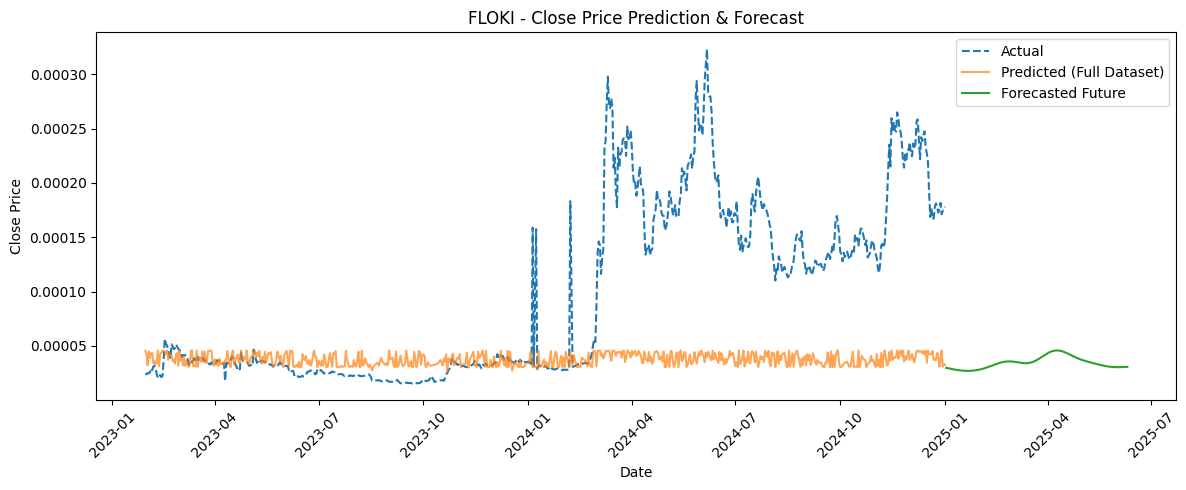

In [23]:
# Plotting and results
for coin in results:
    print(f"\n=== {coin.upper()} ===")
    df = datasets[coin]
    df = df.sort_values('Date').dropna()

    print(df.head(5))  # Display first few rows of the dataset for context
    

    
    for target in targets:
        # Define the folder and filename
        

        print(results[coin][target])
        res = results[coin][target]

        r2 = r2_score(res['actuals'], res['predictions'])

        print(f"\nTarget: {target}")
        print(f"Best Params: {res['best_params']}")
        print(f"Mean Squared Error (MSE): {res['mse']:.8f}")
        print(f"R² Score: {r2:.4f}")

        print("Predicted vs Actual (first 20 test samples):")
        for i in range(min(10, len(res["predictions"]))):
            pred = res["predictions"][i]
            actual = res["actuals"][i]
            print(f"  Predicted: {pred:.6f} | Actual: {actual:.6f}")

        # Future forecast dates starting from day after last date in dataset
        last_date = pd.to_datetime(df['Date'].max())
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(res["future_forecast"]))
        future_dates = future_dates.to_pydatetime()

        # print("Future type :",type(future_dates))
        # print(type(future_dates[0]))
        # print("Resdate :",type(res["dates"]))
        
        # print(type(res["dates"][0]))


        # print("\nForecasted Future Values (based on future compound_score):")
        # for date, forecast in zip(future_dates, res["future_forecast"]):
        #     print(f"  {date.date()} -> Predicted {target}: {forecast:.6f}")

        # Make sure df and predictions are aligned
        test_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):], errors='coerce').dt.to_pydatetime()
        # df = df.sort_values('Date').reset_index(drop=True)

        # Verify length match
        assert len(df) == len(res['full_predictions']), "Length mismatch"
        
        # Plot full dataset actuals vs full predictions
        full_dates = pd.to_datetime(df['Date'])

        # full_dates = pd.to_datetime(datasets[coin]['Date'].iloc[-len(res['actuals']):],dayfirst=True, errors='coerce').dt.to_pydatetime()

        # for i in range(min(20, len(res["full_actuals"]))):
        #     print(f"  Date: {full_dates[i]} | Full Actual: {res['full_actuals'][i]:.6f} | Actual Date: {datasets[coin]['Date'][i]} | Actual Date: {res['dates'][i]} ")

        plt.figure(figsize=(12, 5))
        # res["dates"] = pd.to_datetime(res["dates"], dayfirst=True)
        res_dates_dt = pd.to_datetime(res["dates"]).to_numpy()
        res_dates_dt = np.sort(res_dates_dt)

        plt.plot(res_dates_dt, res["full_actuals"], label="Actual", linestyle='--')
        plt.plot(res_dates_dt, res["full_predictions"], label="Predicted (Full Dataset)", alpha=0.7)
        

        # Plot future forecast
        plt.plot(future_dates, res["future_forecast"], label="Forecasted Future")

        plt.title(f"{coin.upper()} - {target} Price Prediction & Forecast")
        plt.xlabel("Date")
        plt.ylabel(f"{target} Price")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
